# Alpha Vantage

Alpha Vantage APIs are grouped into four categories: 
- (1) Time Series Stock APIs, 
- (2) Fundamental Data, 
- (3) Physical and Digital/Crypto Currencies (e.g., Bitcoin), and 
- (4) Technical Indicators.


https://www.alphavantage.co/documentation/

In [ ]:
!pip install alpha_vantage

In [11]:
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [8]:
# Api Key
k = 'CTUT62DDBNIHLABT'

## Time Series
Using pandas support we can plot the intra-minute value for `'GOOGL'` stock quite easily:

In [9]:
ts = TimeSeries(key=k, output_format='pandas', indexing_type='date')
data, meta_data = ts.get_intraday('GOOGL')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-10-08 17:45:00,1486.0000,1486.00,1486.0000,1486.0000,1047.0
2020-10-08 17:00:00,1485.9100,1485.93,1485.9100,1485.9300,514.0
2020-10-08 16:30:00,1483.4300,1483.43,1483.4300,1483.4300,2075.0
2020-10-08 16:15:00,1483.4300,1483.43,1483.2817,1483.2817,18301.0
2020-10-08 16:00:00,1483.7700,1484.89,1481.1100,1484.5500,125847.0
...,...,...,...,...,...
2020-10-06 11:15:00,1471.7500,1474.94,1466.8500,1468.9500,19607.0
2020-10-06 11:00:00,1473.3700,1476.36,1469.0201,1471.0300,26926.0
2020-10-06 10:45:00,1475.8200,1478.51,1470.0000,1471.6850,31462.0


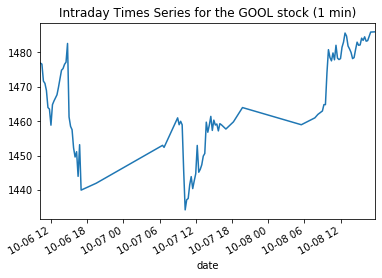

In [29]:
data['4. close'].plot()
plt.title('Intraday Times Series for the GOOL stock (1 min)')
plt.show()

In [48]:
ts = TimeSeries(key=k, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-10-08 17:43:00,1486.0000,1486.0000,1486.0000,1486.0000,1047.0
2020-10-08 16:53:00,1485.9300,1485.9300,1485.9300,1485.9300,150.0
2020-10-08 16:49:00,1485.9100,1485.9100,1485.9100,1485.9100,364.0
2020-10-08 16:18:00,1483.4300,1483.4300,1483.4300,1483.4300,2075.0
2020-10-08 16:13:00,1483.2817,1483.2817,1483.2817,1483.2817,1285.0
...,...,...,...,...,...
2020-09-25 07:55:00,1419.4900,1419.4900,1419.4900,1419.4900,202.0
2020-09-25 07:22:00,1416.9000,1417.0000,1416.9000,1417.0000,1260.0
2020-09-25 07:19:00,1416.6000,1416.6000,1416.6000,1416.6000,739.0


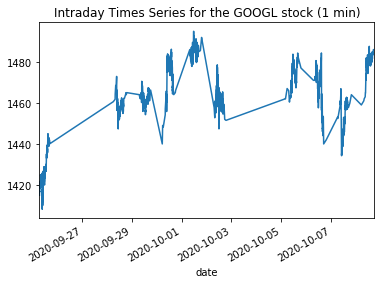

In [49]:
data['4. close'].plot()
plt.title('Intraday Times Series for the GOOGL stock (1 min)')
plt.show()

## Technical indicators
The same way we can get pandas to plot technical indicators like Bollinger Bands®

In [ ]:
from alpha_vantage.techindicators import TechIndicators

In [ ]:
ti = TechIndicators(key=k, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='GOOGL', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MELI stock (60 min)')
plt.show()

## Sector Performance
We can also plot sector performance just as easy:

In [ ]:
from alpha_vantage.sectorperformance import SectorPerformances

In [ ]:
sp = SectorPerformances(key=k, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

## Crypto currencies.
We can also plot crypto currencies prices like `BTC`:

In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [ ]:
cc = CryptoCurrencies(key=k, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

## Foreign Exchange (FX)
The foreign exchange endpoint has no metadata, thus only available as json format and pandas (using the 'csv' format will raise an Error)

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
cc = ForeignExchange(key=k)
data, _ = cc.get_currency_exchange_rate(from_currency='BTC',to_currency='USD')
data

# Your first Bot

The `telegram.ext` submodule is built on top of the pure API implementation. It provides an easy-to-use interface and takes some work off the programmer, so you don't have to repeat yourself.

It consists of several classes, but the two most important ones are `telegram.ext.Updater` and `telegram.ext.Dispatcher`.

The `Updater` class continuously fetches new updates from telegram and passes them on to the `Dispatcher` class. If you create an `Updater` object, it will create a `Dispatcher` for you and link them together with a `Queue`. You can then register handlers of different types in the `Dispatcher`, which will sort the updates fetched by the `Updater` according to the handlers you registered, and deliver them to a callback function that you defined.

Every handler is an instance of any subclass of the `telegram.ext.Handler` class. The library provides handler classes for almost all use cases, but if you need something very specific, you can also subclass Handler yourself.

To begin, you'll need an Access Token. If you have already read and followed Introduction to the API, you can use the one you generated then. If not: To generate an Access Token, you have to talk to `@BotFather` and follow a few simple steps (described here: https://core.telegram.org/bots#6-botfather). You should really read the introduction first, though.

In [ ]:
!pip install python-telegram-bot --upgrade

In [26]:
import telegram
from telegram.ext import Updater
from telegram.ext import CommandHandler, MessageHandler, Filters

In [32]:
def set_bot(token_for_bot):
    '''
    Starts and sets up the bot
    Parameters:
        token_for_bot : token ID of the bot
    '''
    bot = telegram.Bot(token=token_for_bot)
    updater = Updater(token=token_for_bot)
    dispatcher = updater.dispatcher
    return bot, updater, dispatcher

In [2]:
# Set bot token
token_for_bot = '623369080:AAFG4DaG8V0mYtejZOk66pJyVuqXE85dwWo'

# Set Chat ID
chatID = -328059589

In [ ]:
bot, updater, dispatcher = set_bot(token_for_bot)
m = 'Data Science rulez!'

bot.send_message(chat_id=chatID, text=m)

## Your first Bot, step-by-step

So, let's get started! Again, please fire up a Python command line if you want to follow this tutorial.

First, you have to create an `Updater` object. Replace 'TOKEN' with your Bot's API token.

In [3]:
updater = Updater(token=token_for_bot)

**Note:** The `use_context=True` is a special argument only needed for version 12 of the library. The default value is False. It allows for better backwards compatibility with older versions of the library, and to give users some time to upgrade. From version 13 `use_context=True` will be the default.

For quicker access to the Dispatcher used by your Updater, you can introduce it locally:

In [4]:
dispatcher = updater.dispatcher

Now, you can define a function that should process a specific type of update:

In [5]:
def start(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text="I'm a bot, please talk to me!")

The goal is to have this function called every time the Bot receives a Telegram message that contains the `/start` command. To accomplish that, you can use a `CommandHandler` (one of the provided Handler subclasses) and register it in the dispatcher:

In [6]:
start_handler = CommandHandler('start', start)
dispatcher.add_handler(start_handler)

And that's all you need. To start the bot, run:

In [28]:
updater.start_polling()

In [30]:
updater.stop()

Let's add some actual functionality to your bot. We want to implement a `/caps` command that will take some text as an argument and reply to it in CAPS. To make things easy, you can receive the arguments (as a list, split on spaces) that were passed to a command in the callback function:

In [20]:
def caps(update, context):
    text_caps = ' '.join(context.args).upper()
    context.bot.send_message(chat_id=update.effective_chat.id, text=text_caps)

In [21]:
caps_handler = CommandHandler('caps', caps)
dispatcher.add_handler(caps_handler)

Some confused users might try to send commands to the bot that it doesn't understand, so you can use a `MessageHandler` with a command filter to reply to all commands that were not recognized by the previous handlers.

In [22]:
def unknown(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text="Sorry, I didn't understand that command.")

In [27]:
unknown_handler = MessageHandler(Filters.command, unknown)
dispatcher.add_handler(unknown_handler)

# Telegram + Alpha Vantage

In [43]:
bot, updater, dispatcher = set_bot(token_for_bot)

In [44]:
def price(update, context):
    ticker = context.args
    ts = TimeSeries(key=k, output_format='pandas', indexing_type='date')
    try:
        data, meta_data = ts.get_intraday(symbol=ticker, interval='1min')
        price = data.iloc[0, 3]
        context.bot.send_message(chat_id=update.effective_chat.id, text=price)
    except:
        context.bot.send_message(chat_id=update.effective_chat.id, text='Wrong ticker name, try again!')

In [45]:
price_handler = CommandHandler('price', price)
dispatcher.add_handler(price_handler)

In [46]:
updater.start_polling()

In [42]:
updater.stop()